In [4]:
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
import xarray as xr


data=np.loadtxt("2nd_FDtheorem.txt",dtype="complex")
t_cor = data[:,0].real
memoryf = data[:,1]
rdudt = data[:,2]
uu = data[:,3]

data=np.loadtxt("parameter.txt")
nrec = int(data[0])
ista = int(data[1])
nperiod = int(data[2])
nshift = int(data[3])
delta_t = data[4]
ds=xr.open_mfdataset("mzprojection.nc")
t=np.array(ds["t"])
u=np.array(ds["u_real"]+1j*ds["u_imag"])
f=np.array(ds["f_real"]+1j*ds["f_imag"])
omega=ds["omega_real"]+1j*ds["omega_imag"]
s=np.array(ds["s_real"]+1j*ds["s_imag"])
r=np.array(ds["r_real"]+1j*ds["r_imag"])

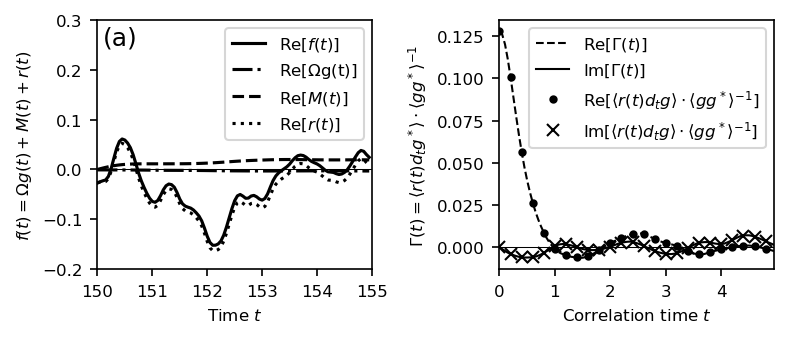

In [5]:
plt.rcParams["font.size"]=8
plt.rcParams["axes.titlesize"]=8

isample=500
fig=plt.figure(figsize=(5.3,2.3),dpi=150)
ax=fig.add_subplot(121)
ax.set_xlabel(r"Time $t$")
ax.set_ylabel(r"$f(t)=\Omega g(t)+M(t)+r(t)$")
ax.set_ylim(-0.2,0.30)
ax.axhline(0,c="k",lw=0.5)
ax.set_xlim(t[ista+nshift*isample],t[ista+nshift*isample+nperiod])
ax.plot(t[ista+nshift*isample:ista+nshift*isample+nperiod],f[:,isample].real,label=r"Re[$f(t)$]",c="k",ls="solid")
ax.plot(t[ista+nshift*isample:ista+nshift*isample+nperiod],(omega*u[:,isample]).real,label=r"Re[$\Omega$g(t)]",c="k",ls="dashdot")
ax.plot(t[ista+nshift*isample:ista+nshift*isample+nperiod],s[:,isample].real,label=r"Re[$M(t)$]",c="k",ls="dashed")
ax.plot(t[ista+nshift*isample:ista+nshift*isample+nperiod],r[:,isample].real,label=r"Re[$r(t)$]",c="k",ls="dotted")
ax.legend(bbox_to_anchor=(1,1),loc="upper right") # bbox_to_anchor:legend is located out.
ax.text(t[ista+nshift*isample]+0.1,0.25,"(a)",fontsize=12)

ax=fig.add_subplot(122)
ax.set_xlabel("Correlation time $t$")
ax.set_ylabel(r"$\Gamma(t) = \langle r(t) d_t g^* \rangle \cdot \langle g g^* \rangle^{-1}$")
ax.axhline(0,c="k",lw=0.5)
ax.plot(t_cor,memoryf[:].real,label=r"Re[$\Gamma(t)$]",lw=1,c="k",ls="dashed")
ax.plot(t_cor,memoryf[:].imag,label=r"Im[$\Gamma(t)$]",lw=1,c="k",ls="solid")
ax.plot(t_cor[::4],(rdudt[::4]/uu[0]).real,".",label=r"Re[$\langle r(t) d_t g \rangle \cdot \langle g g^* \rangle^{-1}$]",c="k")#,dashes=[2,2],linewidth=3)
ax.plot(t_cor[::4],(rdudt[::4]/uu[0]).imag,"x",label=r"Im[$\langle r(t) d_t g \rangle \cdot \langle g g^* \rangle^{-1}$]",c="k")#,dashes=[2,2],linewidth=3)
ax.legend(bbox_to_anchor=(1,1),loc="upper right") # bbox_to_anchor:legend is located out.
ax.set_xlim(0,t_cor[-1])
fig.tight_layout()
plt.savefig("fig_HWturb.pdf")
plt.show()